<a href="https://colab.research.google.com/github/aida-wofford/Andres/blob/main/slit_c_balmer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
__author__ = 'Aida Wofford <awofford@astro.unam.mx>'
__version__ = '20210505'
__datasets__ = ['VLT FORS1']  # datos usados en este notebook
__keywords__ = ['Andrés', 'Doctorado', 'VLT', 'FORS1'], # palabras clave relevantes a este notebook

Ejemplo de cómo cargar los espectros en github de toda la rendija C.

In [30]:
import numpy as np
blue=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Andres/main/intB_34w_6pix.txt', skiprows=1, delimiter=" ")
xb, yb = np.transpose(blue)
red=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Andres/main/intR_34w_6pix.txt', skiprows=1, delimiter=" ")
xr, yr = np.transpose(red)
ld=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Andres/main/intLD_34w_6pix.txt', skiprows=1, delimiter=" ")
xl, yl = np.transpose(ld)

Graficamos lo que bajamos.

Text(0.5, 1.0, 'Toda la rendija C')

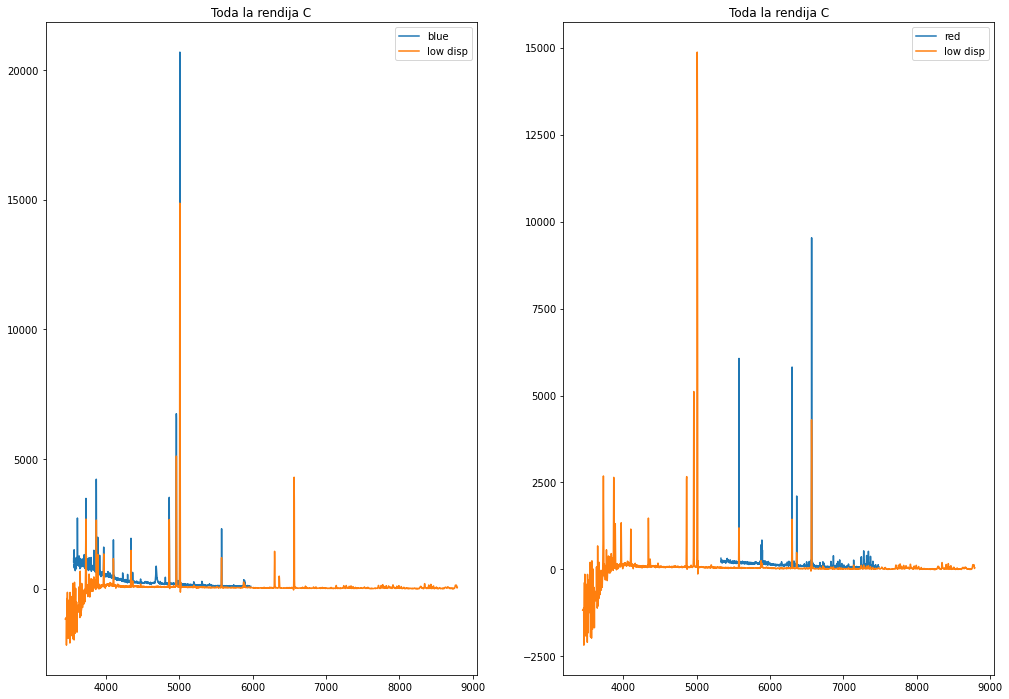

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1,2,figsize=(17,12))
#plt.subplots_adjust(hspace=0.25)
(ax1, ax2) = axes
ax1.plot(xb, yb, label='blue')
ax2.plot(xr, yr, label='red')
ax1.plot(xl, yl, label='low disp')
ax2.plot(xl, yl, label='low disp')
ax1.legend()
ax2.legend()
ax1.set_title('Toda la rendija C')
ax2.set_title('Toda la rendija C')

Otro ejemplo. Ahora bajamos la ventana 22 de la rendija C.

In [59]:
import numpy as np
blue=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Andres/main/espectros_reajustados/spectra002.0022_mod.txt', skiprows=1, delimiter=" ")
xb, yb = np.transpose(blue)
red=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Andres/main/espectros_reajustados/spectra003R.0022_mod.txt', skiprows=1, delimiter=" ")
xr, yr = np.transpose(red)
# HAY UN PROBLEMA CON EL COMMANDO DE ABAJO.
#ld=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Andres/main/espectros_reajustados/spectra004L.0022.fits.txt', skiprows=1, delimiter=" ")
#xl, yl = np.transpose(ld)

Text(0.5, 1.0, 'Rendija C, ventana 22, Rojo')

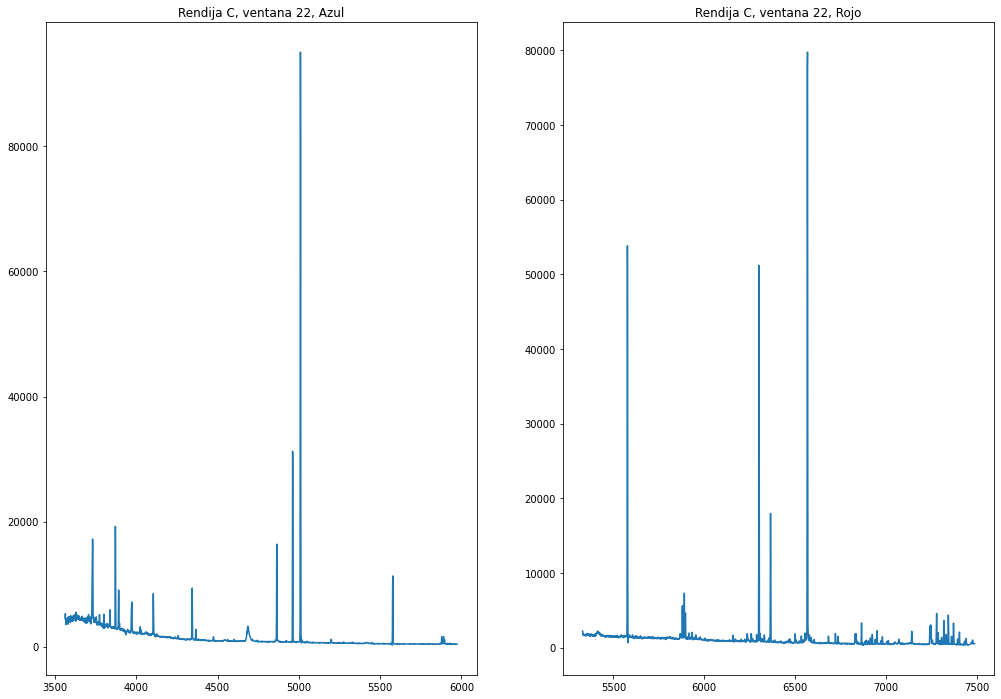

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1,2,figsize=(17,12))
plt.subplots_adjust(hspace=0.25)
(ax1, ax2) = axes
ax1.plot(xb, yb)
ax2.plot(xr, yr)
#ax1.plot(xl, yl)
#ax2.plot(xl, yl)
ax1.set_title('Rendija C, ventana 22, Azul')
ax2.set_title('Rendija C, ventana 22, Rojo')

#ax1.set_xlim(4830,4890)
#ax2.set_xlim(6550,6580)

Definimos la función que usaremos para ajustar Hbeta.

In [62]:
#We will try to fit the data to a function of the form
#$$y = a + b x + \sum_i A_i \exp\left(-\left(\frac{\lambda_i-\lambda_{0i}}{\sigma_i}\right)^2\right)$$
#params = [background_constant, background_slope,
#gaussian_center_1,gaussian_amplitude_1, gaussian_width_1,
#gaussian_center_2,gaussian_amplitude_2, gaussian_width_2,
#...]

def func(x, *params):
    nGauss = int((len(params)-2)/3)
    y = np.zeros_like(x)
    a = params[0]
    b = params[1]
    y = a + b*x
    for gaussian in range(nGauss):
        ctr = params[2+3*gaussian]
        amp = params[2+3*gaussian+1]
        wid = params[2+3*gaussian+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

Ejemplo de cómo obtener la longitud de onda precisa de Hbeta de la base de datos de NIST usando astroquery. Primero hay que instalar astroquery.

In [50]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 12.8MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 3.2MB 35.6MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp37-none-any.whl size=3831874 sha256=aa5f850c400e912c362b3d9f204e0c074d3f230a4a39570fcb860495bf052e54
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [54]:
from astroquery.nist import Nist
import astropy.units as u #esto es para poner las unidades a las longitudes de onda
x0=4861 # Hbeta impreciso
x1=x0-2
x2=x0+2
table = Nist.query(x1 * u.AA, x2 * u.AA, linename = 'H I', wavelength_type='vac+air')
print(table)
x0=table['Observed'][1]
print(x0)

  Observed      Ritz      Transition   Rel.  ... Type   TP    Line  
----------- ----------- ------------- ------ ... ---- ----- --------
         -- 4861.278624   20564.97514     -- ...   -- T8637       --
4861.283363 4861.283363 20564.9550877     -- ...   E2    --    L9496
         --   4861.2841     20564.952     -- ...   --    --      c63
4861.286949 4861.286949 20564.9399183     -- ...   -- T8637    L9477
         --  4861.28837   20564.93391     -- ...   -- T8637       --
4861.296711 4861.296711 20564.8986218     -- ...   M1    --    L9496
4861.297761 4861.297761 20564.8941832     -- ...   -- T8637    L9477
         --    4861.325     20564.779     -- ...   --    --      c64
    4861.35    4861.333      20564.67 180000 ...   -- T8637 L7439c30
         -- 4861.361516   20564.62449     -- ...   -- T8637       --
         --   4861.3622    20564.6216     -- ...   --    --      c65
         -- 4861.365118   20564.60925     -- ...   -- T8637       --
         -- 4861.374864   20564.56

Cargamos el espectro azul de la ventana 22 y extraemos la porción del espectro cerca de Hbeta.

In [56]:
import numpy as np
data=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Andres/main/espectros_reajustados/spectra002.0022_mod.txt', skiprows=1, delimiter=" ")
x, y = np.transpose(data)

subx, suby = np.transpose(np.array([pair for pair in zip(x, y) if pair[0] > x0-30 and pair[0] < x0+30]))

Graficamos la porción de espectro extraída.

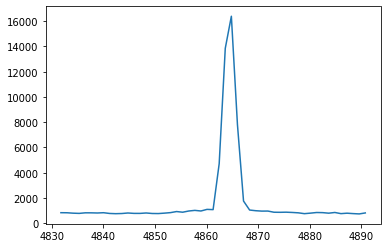

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(subx, suby)

Estimamos los parámetros basados en la gráfica de arriba.

In [64]:
guess = [250, 0,                   #continuum constant, slope
        x0, 16000, 5]             #gaussian center (angstroms), amplitude, width (angstroms)

from scipy.optimize import curve_fit

import math

x=subx
y=suby

popt, pcov = curve_fit(func, x, y, p0=guess)
perr = np.sqrt(np.diag(pcov))
fit = func(x, *popt)


Graficamos Hbeta y el ajuste.

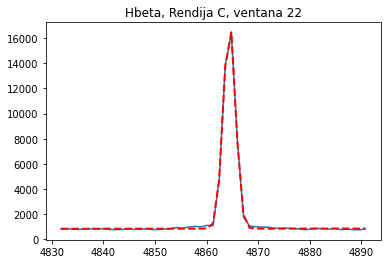

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, y)
plt.title('Hbeta, Rendija C, ventana 22')
plt.plot(x, fit , color='red', linestyle='dashed', zorder=10, linewidth=2) 

Imprimimos resultados.

In [89]:
print(popt)
print(perr)
print('const = {0:.2f}'.format(popt[0]))
print('slope = {0:.2f}'.format(popt[1]))
print('cen={0:.2f}'.format(popt[2]))
print('ampli={0:.2f}'.format(popt[3]))
print('cen_err={0:.5f}'.format(perr[2]/x0*3e5),'km/s','dv={0:.0f}'.format((popt[2]-x0)/x0*3e5),'km/s')
print('sigma={0:.2f}'.format(popt[4]),'sigma_err={0:.0f}'.format(perr[4]/popt[2]*3e5),'km/s','fwhm={0:.0f}'.format(popt[4]*2.355*3e5/popt[2]),'km/s')
print('flux=',np.sqrt(2*3.1416)*popt[3]*popt[4])




[-5.86133762e+02  2.91896871e-01  4.86443673e+03  1.64462454e+04
  1.65645760e+00]
[3.55598179e+03 7.31542367e-01 6.86408267e-03 8.41459072e+01
 9.93528260e-03]
const = -586.13
slope = 0.29
cen=4864.44
ampli=16446.25
cen_err=0.42360 km/s dv=195 km/s
sigma=1.66 sigma_err=1 km/s fwhm=241 km/s
flux= 68286.92121512696
